### Boston Housing dataset Prediction

#### Kolesov Aleksandr (M05-004)

#### 1. Upload libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.decomposition import PCA



#### 2. Upload Dataset

In [72]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
len(boston_dataset['data']), len(boston_dataset['feature_names'])

(506, 13)

In [88]:
print(boston_dataset.DESCR) # information of dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston['MEDV'] = boston_dataset.target

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
boston.isnull().sum() # isnull or not

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### 3. Continuous and Categorical features

In [34]:
boston.CHAS.unique()

array([0., 1.])

In [79]:
boston.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [81]:
boston.RAD.unique() 

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

##### 1. Continuous features: CRIM, INDUS, NOX, RM,TAX,DIS,PTRATIO,B,LSTAT

##### 2. Categorical features: ZN, CHAS, RAD 

##### Categorical Features 

##### Continiuous features

#### Correlation analysis for continious features

In [89]:
boston_upgrade = boston.drop(['CHAS','RAD','ZN'],1)

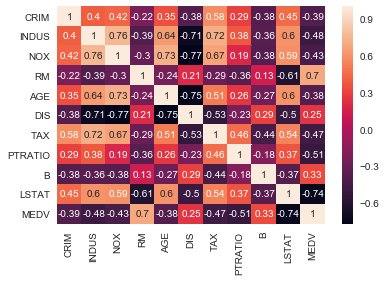

In [90]:
correlation_matrix = boston_upgrade.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In according to correlation analysis one can look at 2 features : LSTAT and RM . Thus, our model will be composed of 2 these features. To reach much more astonishing results one can look for outliers

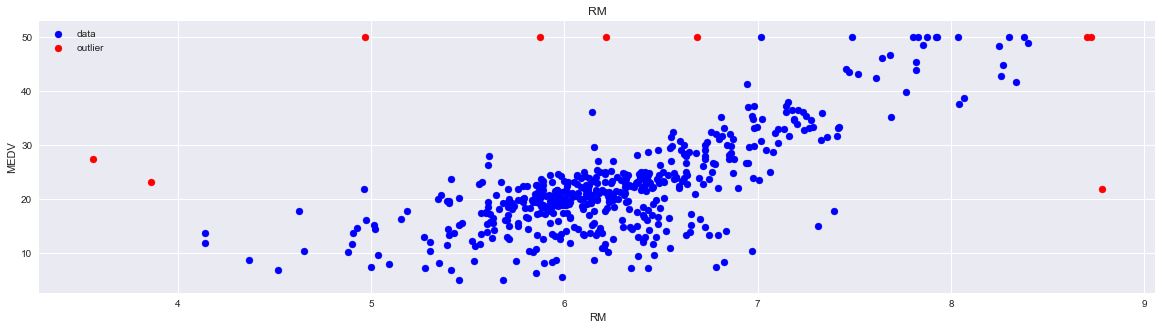

In [114]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

x_,y_,x_d,y_d = [],[],[],[]
idxs_rm = []

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    for num,data,tgt in zip(range(len(x)),x,y):
        if data < 7 and tgt == 50 or data < 4 or data > 8.4:
            x_.append(data)
            y_.append(tgt)
            idxs_rm.append(num)
        else:
            x_d.append(data)
            y_d.append(tgt)
    plt.scatter(x_d, y_d, marker='o',color = 'blue',label='data')
    plt.scatter(x_, y_, marker='o',color = 'red',label='outlier')
    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.legend()

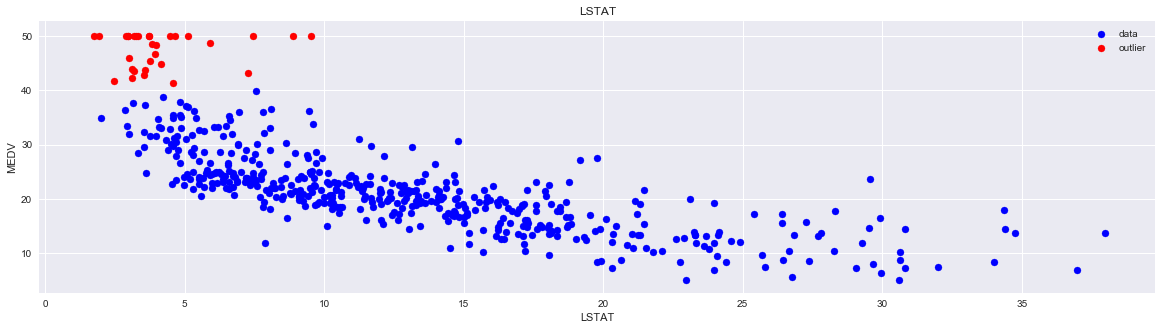

In [113]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = boston['MEDV']

x_,y_,x_d,y_d = [],[],[],[]
idxs_lstat = []

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    for num,data,tgt in zip(range(len(x)),x,y):
        if tgt > 40:
            x_.append(data)
            y_.append(tgt)
            idxs_lstat.append(num)
        
        else:
            x_d.append(data)
            y_d.append(tgt)
    plt.scatter(x_d, y_d, marker='o',color = 'blue',label='data')
    plt.scatter(x_, y_, marker='o',color = 'red',label='outlier')
    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.legend()

In [115]:
idxs_rm

[225, 257, 364, 365, 367, 368, 369, 371, 372]

In [116]:
idxs_lstat

[98,
 157,
 161,
 162,
 163,
 166,
 186,
 195,
 202,
 203,
 204,
 224,
 225,
 228,
 232,
 233,
 253,
 256,
 257,
 261,
 262,
 267,
 268,
 280,
 282,
 283,
 368,
 369,
 370,
 371,
 372]

In [117]:
mask = idxs_rm

In [145]:
column_mask = [col in ('LSTAT','RM','MEDV')for col in boston.columns]

In [146]:
boston_array = np.array(boston)
indices = [ not(idx in idxs_rm) for idx in range(len(boston_array))]

In [147]:
x = boston_array[indices]

In [148]:
x = x[:,column_mask]

In [151]:
X = pd.DataFrame(x, columns = ['LSTAT','RM','MEDV'])

In [157]:
Y = X['MEDV']

In [184]:
X.drop(['MEDV'],1)

,LSTAT,RM,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
492,6.593,9.67,22.4
493,6.120,9.08,20.6
494,6.976,5.64,23.9
495,6.794,6.48,22.0


In [183]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
492    22.4
493    20.6
494    23.9
495    22.0
496    11.9
Name: MEDV, Length: 497, dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


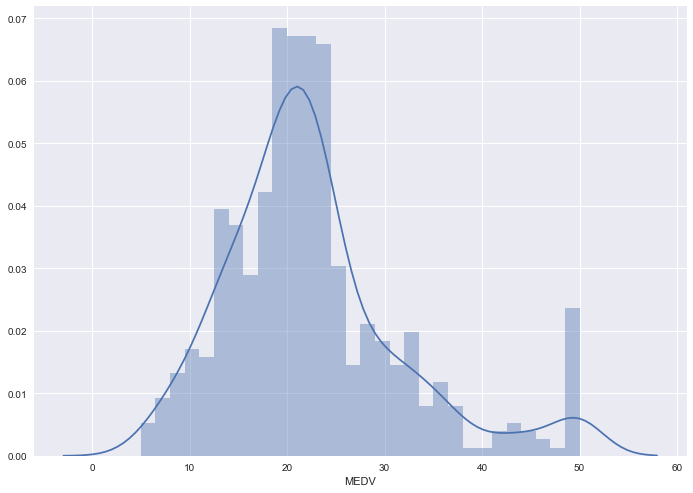

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### R2-score

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(397, 3)
(100, 3)
(397,)
(100,)


In [189]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X.astype('float64'))
X_train_scaled = scaler.transform(X_train.astype('float64'))
X_test_scaled = scaler.transform(X_test.astype('float64'))


In [186]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict,multioutput='variance_weighted')

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 23.656926275941892
R2 score is -6.01749461912502


The model performance for testing set
--------------------------------------
RMSE is 22.90611398576037
R2 score is -7.175120505906779
